In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D Plotting of Systems
import pandas as pd
from sympy import diff
from scipy import integrate
%matplotlib inline

In [2]:
def f_int(t, x, z):
    a, b, c, d, e, f = np.polyfit(x, z, 5)
    return(-t**2 * (5*a*t**4 + 4*b*t**3 + 3*c*t**2 + 2*d*t + e))

In [3]:
def volume_calc(x, z):
    mi = min(x)
    ma = max(x)
    v, err = integrate.quad(f_int, mi, ma, args = (x, z))
    return np.pi*v
    

In [4]:
#Runge-Kutta Method Single Time Step
def rk4(func, t, a, b, c, dt, b_k):
    """
    Peforms a single time step of the Runge-Kutta 4th Order Method.
    The below function finds the ki value for [dx,dy,dz] and return the value to move Yn+1
    func is an input of functions, for the Lorenz system this is [dx,dy,dz]
     
    Recall Rk4 Equations :
    k1 = h*f(xn,yn)
    k2 = h*f(xn+h/2,yn+k1/2)
    k3 = h*f(xn+h/2,yn+k2/2) 
    k4 = h*f(xn,yn+k3)
    Where f is a function [dx,dy,dz]
    Yn+1 = Yn + 1/6*(k1+k2+k3+k4)
    """
    
    k1, k2, k3, k4 = [], [], [], []
    
    for f in func:
        k1.append(dt*f(t, a, b, c, b_k))
        
    for f in func:
        k2.append(dt*f(t+dt/2, a+k1[0]/2, b+k1[1]/2, c+k1[2]/2, b_k))
        
    for f in func:
        k3.append(dt*f(t+dt/2, a+k2[0]/2, b+k2[1]/2, c+k2[2]/2, b_k))
        
    for f in func:
        k4.append( dt*f(t+dt, a+k3[0], b+k3[1], c+k3[1], b_k))
        
    k1, k2, k3, k4 = np.array(k1), np.array(k2), np.array(k3), np.array(k4)
    
    return (1/6)*(k1+2*k2+2*k3+k4)

In [5]:
#function, which calculate error for each c value and finds optipal value

In [6]:
# Constants 

# c = 10*1000/0.073


#b - radios od curvation 
#c - capillar const

#dx, df, dx for equtions, which determine form of the drop
def dx(t, x, fi, z, b):
    return np.cos(fi)

def dfi(t, x, fi, z, b):
    return 2*b-z-np.sin(fi)/(x+1e-5)

def dz(t, x, fi, z, b):
    return -np.sin(fi)

In [7]:
def Laplas(x0, fi0, z0, start_time, time_step, b, t_max):

    x, fi, z = [x0], [fi0], [z0] # Start Points
    count = 0
#     t = start_time or 0 # Start Time
#     dt = time_step or 0.01 # Time Step
    t = start_time  # Start Time
    dt = time_step  # Time Step
    
    while t < t_max:
        t+= dt
        tempx, tempfi, tempz = x[count], fi[count], z[count] # Temporary Start Points
        func = np.array([dx, dfi, dz])
        
        runge_kutta_4 = rk4(func, t, tempx, tempfi, tempz, dt, b) # Rk4 Function
        
        tempx += runge_kutta_4[0]
        tempfi += runge_kutta_4[1]
        tempz += runge_kutta_4[2]
        count +=1
        
        x.append(tempx)
        fi.append(tempfi)
        z.append(tempz)  
    return x, fi, z

In [8]:
#adress to Laplas function and then finds the polyfit approximation of the curve 
def graf(b, t_max):


    np.seterr(all='warn')
    x, fi, z = Laplas(0, 0, 0, 0, 0.01, b, t_max)

    t = np.linspace(0, 1.6, len(z))

    a, b, c, d, e, f = np.polyfit(x, z, 5)

    xx = np.arange(min(x), max(x), 0.01)
    yy = a*xx**5 + b*xx**4 + c*xx**3 + d*xx**2 + e*xx + f

#     plt.plot(xx, yy)
    V = volume_calc(x, z)
    print(V)
    return (x, fi, z)



In [9]:
#finds current angle with diff
def angle(x, y):
    return np.arctan(np.diff(y)/np.diff(x))

In [10]:
#determine contact angle
def angl_exp(x1, y1):
    ln = len(x1)
    atan = np.arctan(diff(y1.loc[ln-2:ln-1])/diff(x1.loc[ln-2:ln-1])).reset_index(drop=True)
    return atan[1]

In [11]:
#finds x, z, which angle is equal to experimental
def finds_angle(agl, experim_angl):
    
    for i in range(1, len(agl)):
        if abs(agl[i])>abs(experim_angl):
            return i

4.021293294829112


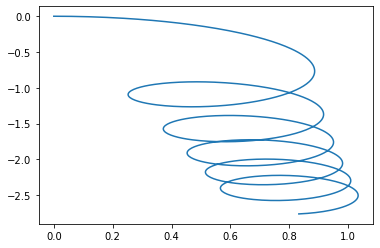

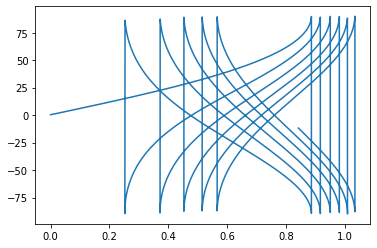

In [12]:
#main function, which adress to other functions and receive the x, z and fi

b = 1
t_max = 10
x, fi, z = graf(b, t_max)


agl = angle(x, z)
plt.figure()
plt.plot(x, z)
plt.figure()
plt.plot(x[0:-1], -agl*180/np.pi)




60.94539590092286


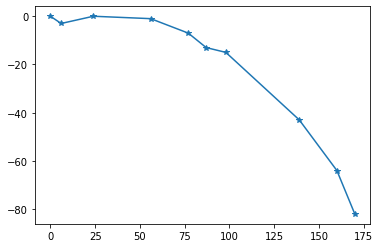

In [13]:
#Import exp data from file, plot graf and determine contact angle

h = pd.read_csv('hhh.csv')

h['x'] = -h['x']
h['y'] = -h['y']

h['x'] = h['x'] - h['x'].loc[28]
h['y'] = h['y'] - h['y'].loc[28]

x1 = h['x'].loc[28:37].reset_index(drop=True)
y1 = h['y'].loc[28:37].reset_index(drop=True)


plt.plot(x1, y1, marker = '*')

ct_angl = angl_exp(x1, y1)
print(-ct_angl*180/np.pi)
# plt.plot(x, z)
# plt.plot(h['x'], h['y'])

61.670734862391136
60.94539590092286


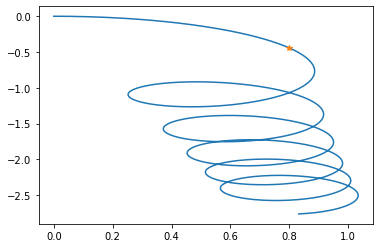

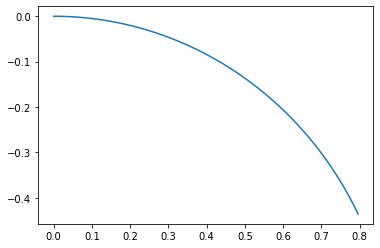

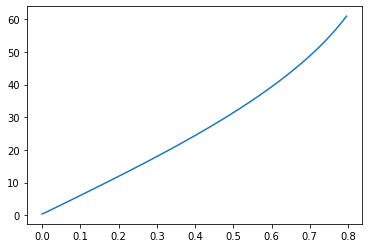

In [17]:
#plotting curve with point, denote the contact angle and cut curve 

ind = finds_angle(agl, ct_angl)


print(-agl[ind]*180/np.pi)
print(-ct_angl*180/np.pi)

plt.figure()
plt.plot(x, z)

plt.plot(x[ind], z[ind], marker = '*')

x_cut = x[0:ind]
z_cut = z[0:ind]
agl_cut = agl[0:ind]

plt.figure()
plt.plot(x_cut, z_cut)

plt.figure()
plt.plot(x_cut, -agl_cut*180/np.pi)